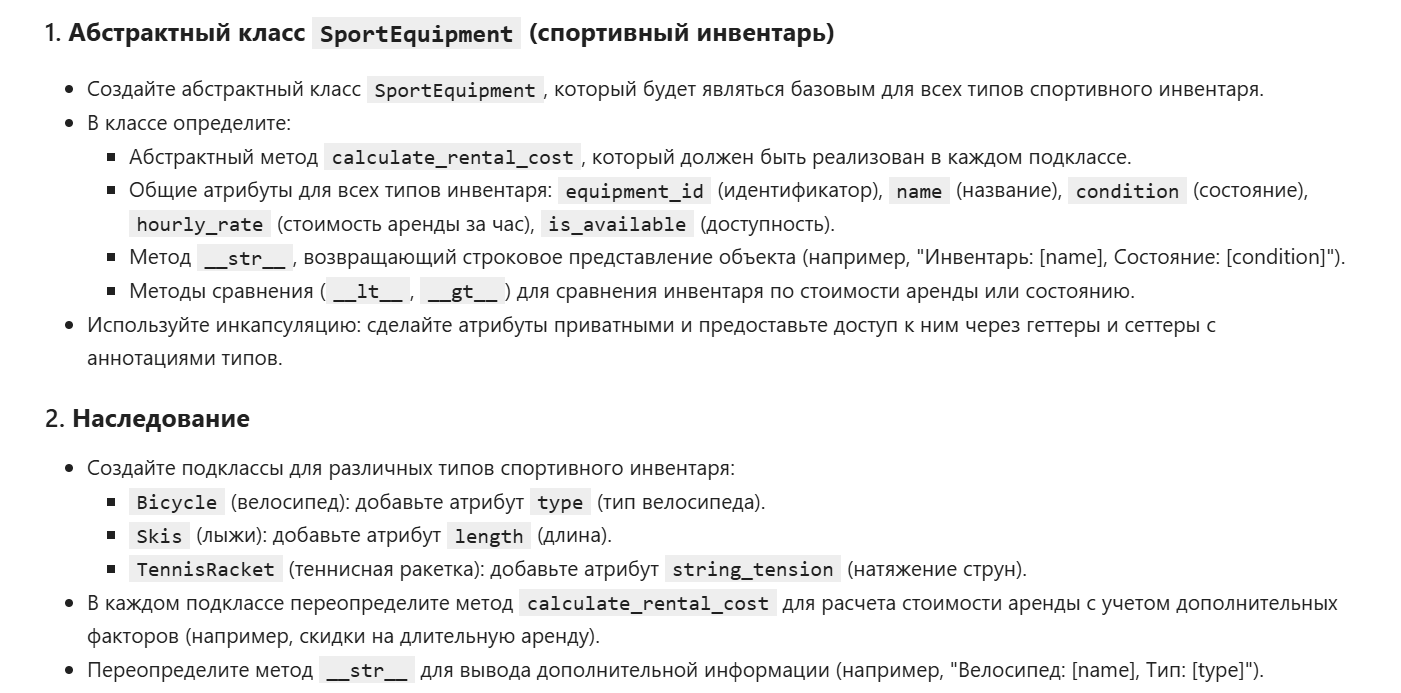

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
class SportEquipment(ABC):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available


    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"


if __name__ == '__main__':
    eq1 = Bicycle('1','motor', 'good', 1.2, 'Mountain')
    eq2 = TennisRacket('1', 'mot', 'good', 1.2, 123)
    eq3 = Skis('1', 'm', 'good', 1.2, 190)
    print(eq1)
    print(eq2)
    print(eq3)

Велосипед: motor, Тип: Mountain
Теннисная ракетка: mot, Натяжение: 123
Лыжи: m, Длина: 190


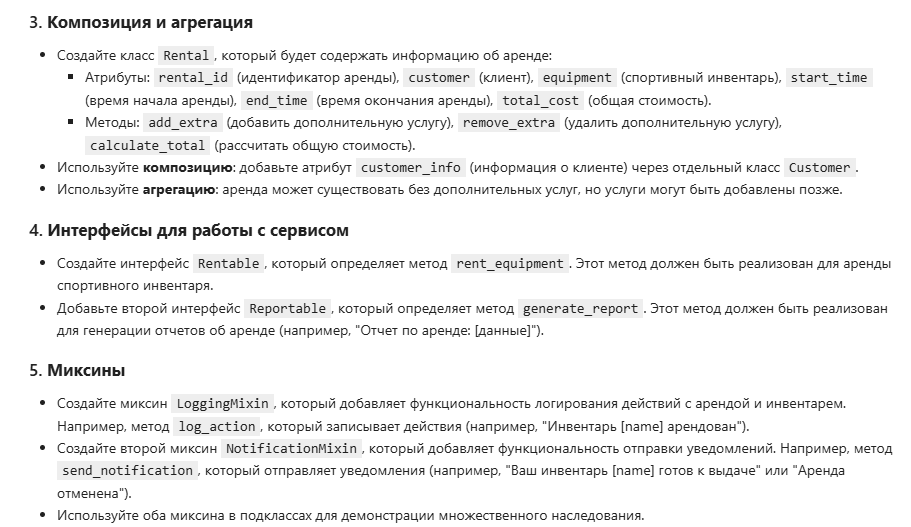

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime


class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(ABC):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(ABC):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable, LoggingMixin, NotificationMixin, ABC):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.calculate_total()}.")

    def generate_report(self) -> str:
        return self.__str__()


if __name__ == '__main__':
    eq1 = Bicycle('1','motor', 'good', 1.2, 'Mountain')
    eq2 = TennisRacket('1', 'mot', 'good', 1.2, 123)
    eq3 = Skis('1', 'm', 'good', 1.2, 190)
    print(eq1)
    print(eq2)
    print(eq3)
    rent = eq1.rent_equipment(Customer('1', 'Anton', 'mmm@ru'), datetime.now())
    rent.end_time = datetime(2025, 5, 1)
    print(rent.generate_report())

[NOTIFICATION] Инвентарь motor готов к выдаче
[NOTIFICATION] Инвентарь mot готов к выдаче
[NOTIFICATION] Инвентарь m готов к выдаче
Велосипед: motor, Тип: Mountain
Теннисная ракетка: mot, Натяжение: 123
Лыжи: m, Длина: 190
[LOG] Инвентарь motor арендован
Отчет по аренде #rent_1_1745162448
Клиент: Клиент Anton ID: 1
Инвентарь: Велосипед: motor, Тип: Mountain
Длительность: 248.65317217972225 ч
Доп. услуги: нет
Общая стоимость: 268.54542595410004.


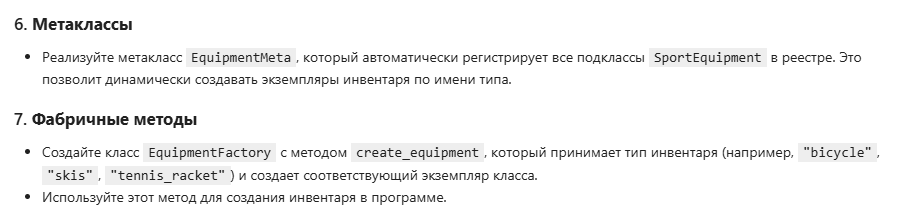

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime



class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(ABC):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.calculate_total()}.")

    def generate_report(self) -> str:
        return self.__str__()

class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


if __name__ == '__main__':
    EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')
    EquipmentFactory.create_equipment('skis', '1', 'mot', 'good', 1.2, 123)
    EquipmentFactory.create_equipment('tennisracket', '1', 'm', 'good', 1.2, 190)
    try:
        EquipmentFactory.create_equipment('hahahahahah', 1)
    except Exception as e:
        print(e)


[NOTIFICATION] Инвентарь motor готов к выдаче
[NOTIFICATION] Инвентарь mot готов к выдаче
[NOTIFICATION] Инвентарь m готов к выдаче
Неизвестный тип инвентаря: hahahahahah


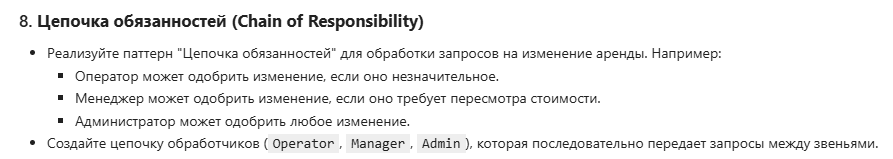

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime



class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(ABC):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.calculate_total()}.")

    def generate_report(self) -> str:
        return self.__str__()

class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


class Request:
    def __init__(self, type: str, newprice: float, approved: bool = False):
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    @property
    def approved(self) -> bool:
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        if not self.__approved:
            self.__approved = new


class ChangeHandler(ABC):
    def __init__(self, next=None):
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        pass

class Operator(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'small':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Manager(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'average':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Admin(ChangeHandler):
    def handle_request(self, request):
        request.approved = True
        return True

if __name__ == '__main__':
    handler = Operator(Manager(Admin()))
    eq1 = EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')
    EquipmentFactory.create_equipment('skis', '1', 'mot', 'good', 1.2, 123)
    EquipmentFactory.create_equipment('tennisracket', '1', 'm', 'good', 1.2, 190)
    r = Request('big', 1233333333)
    rent = eq1.rent_equipment(Customer('1', 'Anton', 'help@mail.ru'), datetime.now())

    cost = rent.total_cost
    if handler.handle_request(r):
        cost = r.newprice
    print(f'Новая одобренная цена: {cost}')

[NOTIFICATION] Инвентарь motor готов к выдаче
[NOTIFICATION] Инвентарь mot готов к выдаче
[NOTIFICATION] Инвентарь m готов к выдаче
[LOG] Инвентарь motor арендован
Новая одобренная цена: 1233333333


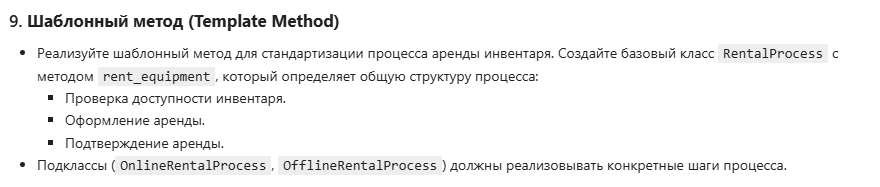

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime



class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(metaclass=EquipmentMeta):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None
        self.__total_cost_approved: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    @property
    def total_cost_approved(self) -> float:
        return self.__total_cost_approved

    @total_cost_approved.setter
    def total_cost_approved(self, new: float) -> None:
        if self.__total_cost_approved is None:
            self.__total_cost_approved = new
            self.end_time = datetime.now()
        return self.__total_cost_approved

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.total_cost_approved}.")

    def generate_report(self) -> str:
        return self.__str__()

class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


class Request:
    def __init__(self, type: str, newprice: float, approved: bool = False):
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    @property
    def approved(self) -> bool:
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        if not self.__approved:
            self.__approved = new


class ChangeHandler(ABC):
    def __init__(self, next=None):
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        pass

class Operator(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'small':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Manager(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'average':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Admin(ChangeHandler):
    def handle_request(self, request):
        request.approved = True
        return True


class RentalProcess(Rentable, Reportable, LoggingMixin):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        self.equipment = equipment
        self.customer = customer

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        if self.check():
            rent =  self.create()
            price = rent.total_cost

            rent.total_cost_approved = self.confirm(price, request)
            return rent
        else:
            raise ValueError("Инвентарь недоступен")

    @abstractmethod
    def check(self):
        pass

    @abstractmethod
    def create(self):
        pass

    @abstractmethod
    def confirm(self):
        pass

class OnlineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало онлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Онлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости онлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())

        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом онлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price



class OfflineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало оффлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Оффлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости оффлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом оффлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price


if __name__ == '__main__':
    handler = Operator(Manager(Admin()))
    eq1 = EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')
    EquipmentFactory.create_equipment('skis', '1', 'mot', 'good', 1.2, 123)
    EquipmentFactory.create_equipment('tennisracket', '1', 'm', 'good', 1.2, 190)

    proc = OnlineRentalProcess(eq1, Customer('1', 'Anton', 'help@mail.ru'))
    rent = proc.rent_equipment(None)
    print(rent)


[NOTIFICATION] Инвентарь motor готов к выдаче
[NOTIFICATION] Инвентарь mot готов к выдаче
[NOTIFICATION] Инвентарь m готов к выдаче
[LOG] Начало онлайн процесса ренты
[LOG] Онлайн проверка
[LOG] подсчет базовой стоимости онлайн
[LOG] Инвентарь motor арендован
[LOG] Согласование цены с персоналом онлайн
Отчет по аренде #rent_1_1745171568
Клиент: Клиент Anton ID: 1
Инвентарь: Велосипед: motor, Тип: Mountain
Длительность: 9.444444444444445e-09 ч
Доп. услуги: нет
Общая стоимость: 6.333333333333334e-09.
Отчет по аренде #rent_1_1745171568
Клиент: Клиент Anton ID: 1
Инвентарь: Велосипед: motor, Тип: Mountain
Длительность: 9.444444444444445e-09 ч
Доп. услуги: нет
Общая стоимость: 6.333333333333334e-09.


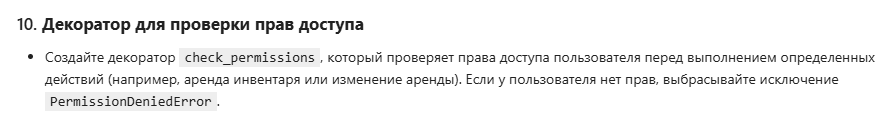

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime



class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(metaclass=EquipmentMeta):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise ValueError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None
        self.__total_cost_approved: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    @property
    def total_cost_approved(self) -> float:
        return self.__total_cost_approved

    @total_cost_approved.setter
    def total_cost_approved(self, new: float) -> None:
        if self.__total_cost_approved is None:
            self.__total_cost_approved = new
            self.end_time = datetime.now()
        return self.__total_cost_approved

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.total_cost_approved}.")

    def generate_report(self) -> str:
        return self.__str__()

class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


class Request:
    def __init__(self, type: str, newprice: float, approved: bool = False):
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    @property
    def approved(self) -> bool:
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        if not self.__approved:
            self.__approved = new


class ChangeHandler(ABC):
    def __init__(self, next=None):
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        pass

class Operator(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'small':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Manager(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'average':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Admin(ChangeHandler):
    def handle_request(self, request):
        request.approved = True
        return True


class RentalProcess(Rentable, Reportable, LoggingMixin):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        self.equipment = equipment
        self.customer = customer

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        if self.check():
            rent =  self.create()
            price = rent.total_cost

            rent.total_cost_approved = self.confirm(price, request)
            return rent
        else:
            raise ValueError("Инвентарь недоступен")

    @abstractmethod
    def check(self):
        pass

    @abstractmethod
    def create(self):
        pass

    @abstractmethod
    def confirm(self):
        pass

class OnlineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало онлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Онлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости онлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())

        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом онлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price



class OfflineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало оффлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Оффлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости оффлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом оффлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price

class PermissionDeniedError(Exception):
    def __init__(self, msg="Нет прав доступа"):
        self.msg = msg
        super().__init__(msg)


def check_permissions(required_permission):
    def decorator(func):
        def wrapper(self, *args, **kwargs):
            if required_permission > self.access:
                raise PermissionDeniedError
            return func(self, *args, **kwargs)
        return wrapper
    return decorator


class Salesman:
    def __init__(self, access: int) -> None:
        self.access = access

    @check_permissions(3)
    def makesale(self, rentalprocess, request = None):
        return rentalprocess.rent_equipment(request)



if __name__ == '__main__':
    sl = Salesman(1)
    eq1 = EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')

    proc = OnlineRentalProcess(eq1, Customer('1', 'Anton', 'help@mail.ru'))


    try:
        rent = sl.makesale(proc, None)
    except PermissionDeniedError as e:
        print(e)

    rent = Salesman(3).makesale(proc)






[NOTIFICATION] Инвентарь motor готов к выдаче
Нет прав доступа
[LOG] Начало онлайн процесса ренты
[LOG] Онлайн проверка
[LOG] подсчет базовой стоимости онлайн
[LOG] Инвентарь motor арендован
[LOG] Согласование цены с персоналом онлайн
Отчет по аренде #rent_1_1745174803
Клиент: Клиент Anton ID: 1
Инвентарь: Велосипед: motor, Тип: Mountain
Длительность: 1.1944444444444444e-08 ч
Доп. услуги: нет
Общая стоимость: 7.666666666666667e-09.


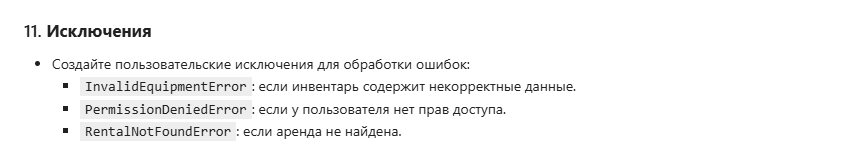

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime
from dataclasses import asdict


class InvalidEquipmentError(Exception):
    def __init__(self, msg="Инвентарь содержит некорректные данные"):
        self.msg = msg
        super().__init__(msg)

class RentalNotFoundError(Exception):
    def __init__(self, msg = 'Рента не найдена'):
        self.msg = msg
        super().__init__(msg)


class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(metaclass=EquipmentMeta):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"

class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None
        self.__total_cost_approved: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    @property
    def total_cost_approved(self) -> float:
        return self.__total_cost_approved

    @total_cost_approved.setter
    def total_cost_approved(self, new: float) -> None:
        if self.__total_cost_approved is None:
            self.__total_cost_approved = new
            self.end_time = datetime.now()
        return self.__total_cost_approved

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.total_cost_approved}.")

    def generate_report(self) -> str:
        return self.__str__()

class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


class Request:
    def __init__(self, type: str, newprice: float, approved: bool = False):
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    @property
    def approved(self) -> bool:
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        if not self.__approved:
            self.__approved = new


class ChangeHandler(ABC):
    def __init__(self, next=None):
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        pass

class Operator(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'small':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Manager(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'average':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Admin(ChangeHandler):
    def handle_request(self, request):
        request.approved = True
        return True


class RentalProcess(Rentable, Reportable, LoggingMixin):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        self.equipment = equipment
        self.customer = customer

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        if self.check():
            rent =  self.create()
            price = rent.total_cost

            rent.total_cost_approved = self.confirm(price, request)
            return rent
        else:
            raise ValueError("Инвентарь недоступен")

    @abstractmethod
    def check(self):
        pass

    @abstractmethod
    def create(self):
        pass

    @abstractmethod
    def confirm(self):
        pass

class OnlineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало онлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Онлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости онлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())

        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом онлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price



class OfflineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало оффлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Оффлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости оффлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом оффлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price

class PermissionDeniedError(Exception):
    def __init__(self, msg="Нет прав доступа"):
        self.msg = msg
        super().__init__(msg)


def check_permissions(required_permission):
    def decorator(func):
        def wrapper(self, *args, **kwargs):
            if required_permission > self.access:
                raise PermissionDeniedError
            return func(self, *args, **kwargs)
        return wrapper
    return decorator


class Salesman:
    def __init__(self, access: int) -> None:
        self.access = access

    @check_permissions(3)
    def makesale(self, rentalprocess, request = None):
        return rentalprocess.rent_equipment(request)



if __name__ == '__main__':
    sl = Salesman(1)
    eq1 = EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')

    proc = OnlineRentalProcess(eq1, Customer('1', 'Anton', 'help@mail.ru'))


    try:
        rent = sl.makesale(proc, None)
    except PermissionDeniedError as e:
        print(e)

    rent = Salesman(3).makesale(proc)






[NOTIFICATION] Инвентарь motor готов к выдаче
Нет прав доступа
[LOG] Начало онлайн процесса ренты
[LOG] Онлайн проверка
[LOG] подсчет базовой стоимости онлайн
[LOG] Инвентарь motor арендован
[LOG] Согласование цены с персоналом онлайн
Отчет по аренде #rent_1_1745178990
Клиент: Клиент Anton ID: 1
Инвентарь: Велосипед: motor, Тип: Mountain
Длительность: 2.138888888888889e-08 ч
Доп. услуги: нет
Общая стоимость: 1.8e-08.


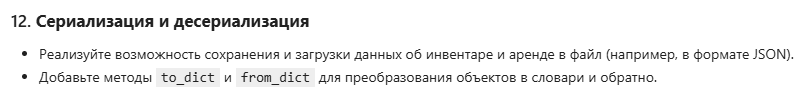

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime
from dataclasses import asdict
class InvalidEquipmentError(Exception):
    def __init__(self, msg="Инвентарь содержит некорректные данные"):
        self.msg = msg
        super().__init__(msg)

class RentalNotFoundError(Exception):
    def __init__(self, msg = 'Рента не найдена'):
        self.msg = msg
        super().__init__(msg)


class EquipmentMeta(type):
    registry = {}
    def __new__(cls, name, bases, namespace):
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
        return new_class

class LoggingMixin:
    def log_action(self, txt: str) -> str:
        return f"[LOG] {txt}"

class NotificationMixin:
    def send_notification(self, txt) -> str:
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        pass

class Reportable(metaclass=EquipmentMeta):
    @abstractmethod
    def generate_report(self) -> str:
        pass


class SportEquipment(Rentable,LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    def __init__(
        self, # SportEquipment
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        self.__equipment_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def condition(self) -> str:
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError("Недопустимое значение для цены")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        pass

    def __str__(self) -> str:
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        if not self.is_available:
            raise ValueError("Инвентарь недоступен")

        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)



    def to_dict(self) -> Dict[str, Any]:
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> SportEquipment:
        return cls(*data.values())


class Bicycle(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type

    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Велосипед: {self.name}, Тип: {self.__type}"


    def to_dict(self) -> Dict[str, Any]:
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'type': self.type,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> Bicycle:
        return cls(*data.values())




class Skis(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length

    @property
    def length(self) -> float:
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Лыжи: {self.name}, Длина: {self.__length}"

    def to_dict(self) -> Dict[str, Any]:
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'length': self.length,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> Skis:
        return cls(*data.values())




class TennisRacket(SportEquipment):
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension

    @property
    def string_tension(self) -> float:
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        if new < 0:
            raise InvalidEquipmentError("Недопустимое значение для напряжения")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

    def to_dict(self) -> Dict[str, Any]:
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'string_tension': self.string_tension,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> TennisRacket:
        return cls(*data.values())



class Customer:
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email

    @property
    def customer_id(self) -> str:
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        self.__customer_id = new

    @property
    def name(self) -> str:
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        self.__name = new

    @property
    def email(self) -> str:
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        self.__email = new

    def __str__(self) -> str:
        return f"Клиент {self.name} ID: {self.customer_id}"

    def to_dict(self) -> Dict[str, Any]:
        return {
            'cutstomer_id': self.customer_id,
            'name': self.name,
            'email': self.email
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> Customer:
        return cls(*data.values())




class Rental(Reportable, LoggingMixin, NotificationMixin):
    def __init__(
        self,
        rental_id: str,
        customer: Customer, # типо не создастся без Customer
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None,
        extras: Optional[Dict[str, float]] = None
    ):
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {} # слабая связь тк можем добавить а можем и нет
        self.__total_cost: Optional[float] = None
        self.__total_cost_approved: Optional[float] = None

    @property
    def rental_id(self)  -> str:
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        if self.__end_time is None:
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    @property
    def total_cost_approved(self) -> float:
        return self.__total_cost_approved

    @total_cost_approved.setter
    def total_cost_approved(self, new: float) -> None:
        if self.__total_cost_approved is None:
            self.__total_cost_approved = new
            self.end_time = datetime.now()
        return self.__total_cost_approved

    def add_extra(self, service: str, price: float) -> None:
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        if service in self.__extras:
            del self.__extras[service]
            self.__total_cost = None

    # Не закрывает ренту
    def calculate_total(self) -> float:
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()

        hours = (end - self.start_time).total_seconds() / 3600

        base_cost = self.equipment.calculate_rental_cost(hours)

        extras_cost = sum(self.__extras.values())

        self.__total_cost = base_cost + extras_cost
        return self.__total_cost

    def __str__(self):
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" + f"Клиент: {self.customer_info}\n" + f"Инвентарь: {self.equipment}\n" + f"Длительность: {duration} ч\n" + f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" + f"Общая стоимость: {self.total_cost_approved}.")

    def generate_report(self) -> str:
        return self.__str__()


    def to_dict(self) -> Dict[str, Any]:
        return {
            'rental_id': self.rental_id,
            'customer_info': self.customer_info.to_dict(),
            'equipment': self.equipment.to_dict(),
            'start_time': self.start_time.timestamp(),
            'end_time': self.end_time.timestamp() if self.end_time else None,
            'extras': self.__extras
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> Rental:
        h = list(data.values())

        k = h[2]
        z = None
        if len(k) < 6:
            z = SportEquipment.from_dict(k)
        elif k[5] == 'length':
            z = Skis.from_dict(k)
        elif k[5] == 'type':
            z = Bicycle.from_dict(k)
        else:
            z = TennisRacket.from_dict(k)


        return cls(h[0],
                   Customer.from_dict(h[1]),
                   z,
                   datetime.fromtimestamp(h[3]),
                   datetime.fromtimestamp(h[4]) if h[4] else None)



class EquipmentFactory:
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        return equipment(*args, **kwargs)


class Request:
    def __init__(self, type: str, newprice: float, approved: bool = False):
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
    @property
    def type(self) -> str:
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        self.__type = new

    @property
    def approved(self) -> bool:
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        if not self.__approved:
            self.__approved = new


class ChangeHandler(ABC):
    def __init__(self, next=None):
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        pass

class Operator(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'small':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Manager(ChangeHandler):
    def handle_request(self, request):
        if request.type == 'average':
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        return False

class Admin(ChangeHandler):
    def handle_request(self, request):
        request.approved = True
        return True


class RentalProcess(Rentable, Reportable, LoggingMixin):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        self.equipment = equipment
        self.customer = customer

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        if self.check():
            rent =  self.create()
            price = rent.total_cost

            rent.total_cost_approved = self.confirm(price, request)
            return rent
        else:
            raise ValueError("Инвентарь недоступен")

    @abstractmethod
    def check(self):
        pass

    @abstractmethod
    def create(self):
        pass

    @abstractmethod
    def confirm(self):
        pass

class OnlineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало онлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Онлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости онлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())

        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом онлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price



class OfflineRentalProcess(RentalProcess):
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        print(self.log_action(f'Начало оффлайн процесса ренты'))
        z =  super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        print(self.log_action(f'Оффлайн проверка'))
        return self.equipment.is_available

    def create(self):
        print(self.log_action(f'подсчет базовой стоимости оффлайн'))
        rent =  self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        print(self.log_action(f'Согласование цены с персоналом оффлайн'))
        if request:
                price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price

class PermissionDeniedError(Exception):
    def __init__(self, msg="Нет прав доступа"):
        self.msg = msg
        super().__init__(msg)


def check_permissions(required_permission):
    def decorator(func):
        def wrapper(self, *args, **kwargs):
            if required_permission > self.access:
                raise PermissionDeniedError
            return func(self, *args, **kwargs)
        return wrapper
    return decorator


class Salesman:
    def __init__(self, access: int) -> None:
        self.access = access

    @check_permissions(3)
    def makesale(self, rentalprocess, request = None):
        return rentalprocess.rent_equipment(request)





if __name__ == '__main__':
    test = SportEquipment('1','motor', 'good', 1.2, 'Mountain')
    print(test.to_dict().values())
    print(SportEquipment.from_dict(test.to_dict()))
    rent = test.rent_equipment(Customer('1', 'Anton', 'haha'), datetime.now())

    print(rent.to_dict())
    print(Rental.from_dict(rent.to_dict()))






    # eq1 = EquipmentFactory.create_equipment('bicycle', '1','motor', 'good', 1.2, 'Mountain')
    # print((eq1.to_dict()))
    # print(Bicycle.from_dict(eq1.to_dict()))







    # proc = OnlineRentalProcess(eq1, Customer('1', 'Anton', 'help@mail.ru'))


    # try:
    #     rent = sl.makesale(proc, None)
    # except PermissionDeniedError as e:
    #     print(e)

    # rent = Salesman(3).makesale(proc)






[NOTIFICATION] Инвентарь motor готов к выдаче
dict_values(['1', 'motor', 'good', 1.2, 'Mountain'])
[NOTIFICATION] Инвентарь motor готов к выдаче
Инвентарь: motor, Состояние: good
[LOG] Инвентарь motor арендован
{'rental_id': 'rent_1_1745182484', 'customer_info': {'cutstomer_id': '1', 'name': 'Anton', 'email': 'haha'}, 'equipment': {'equipment_id': '1', 'name': 'motor', 'condition': 'good', 'hourly_rate': 1.2, 'is_available': False}, 'start_time': 1745182484.952803, 'end_time': None, 'extras': {}}
[NOTIFICATION] Инвентарь motor готов к выдаче
Отчет по аренде #rent_1_1745182484
Клиент: Клиент Anton ID: 1
Инвентарь: Инвентарь: motor, Состояние: good
Длительность: не завершена ч
Доп. услуги: нет
Общая стоимость: None.


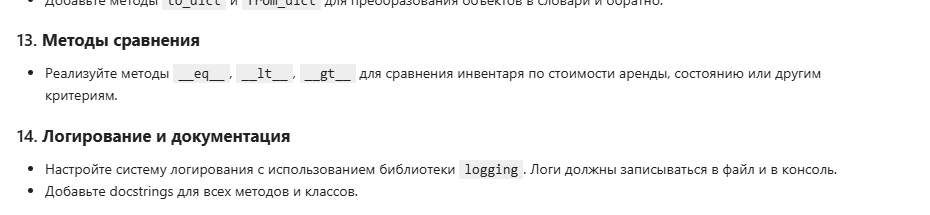

In [1]:
from abc import ABC, abstractmethod
from typing import Any, Optional, List, Dict
from datetime import datetime
from dataclasses import asdict
import logging
from logging.handlers import RotatingFileHandler

def setup_logger():
    """Настраивает логгер для вывода в консоль и файл"""
    logger = logging.getLogger("equipment_system")
    logger.setLevel(logging.DEBUG)
    formatter = logging.Formatter(
        "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S"
    )
    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.INFO)
    console_handler.setFormatter(formatter)
    file_handler = RotatingFileHandler(
        "system.log",
        maxBytes=5 * 1024 * 1024,
        backupCount=3,
        encoding="utf-8"
    )
    file_handler.setLevel(logging.DEBUG)
    file_handler.setFormatter(formatter)
    logger.addHandler(console_handler)
    logger.addHandler(file_handler)
    return logger

logger = setup_logger()

class InvalidEquipmentError(Exception):
    '''Класс ошибки для некорректных данных инвентаря'''
    def __init__(self, msg="Инвентарь содержит некорректные данные"):
        '''Конструктор класса'''
        self.msg = msg
        logger.error(msg)
        super().__init__(msg)

class RentalNotFoundError(Exception):
    '''Класс ошибки для не найденной ренты'''
    def __init__(self, msg='Рента не найдена'):
        '''Конструктор этого класса'''
        self.msg = msg
        logger.error(msg)
        super().__init__(msg)

class EquipmentMeta(type):
    '''Метакласс для контроля создания классов оборудования'''
    registry = {}

    def __new__(cls, name, bases, namespace):
        '''Авторегистрация классов оборудования'''
        new_class = super().__new__(cls, name, bases, namespace)
        if name != 'SportEquipment':
            cls.registry[name.lower()] = new_class
            logger.debug(f"Зарегистрирован класс оборудования: {name}")
        return new_class

class LoggingMixin:
    '''Миксин для логирования действий'''
    def log_action(self, txt: str) -> str:
        '''Метод для логирования действий'''
        logger.info(txt)
        return f"[LOG] {txt}"

class NotificationMixin:
    '''Миксин для уведомлений'''
    def send_notification(self, txt) -> str:
        '''Метод для отправки уведомлений'''
        logger.info(f"Уведомление: {txt}")
        return f"[NOTIFICATION] {txt}"

class Rentable(metaclass=EquipmentMeta):
    '''Интерфейс для арендуемых объектов'''
    @abstractmethod
    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        '''Абстрактный метод для аренды оборудования'''
        pass

class Reportable(metaclass=EquipmentMeta):
    '''Интерфейс для генерации отчетов'''
    @abstractmethod
    def generate_report(self) -> str:
        '''Абстрактный метод для генерации отчета'''
        pass

class SportEquipment(Rentable, LoggingMixin, NotificationMixin, metaclass=EquipmentMeta):
    '''Абстрактный класс спортивного инвентаря'''
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        is_available: bool = True,
    ) -> None:
        '''Конструктор спортивного инвентаря'''
        self.__equipment_id = equipment_id
        self.__name = name
        self.__condition = condition
        self.__hourly_rate = hourly_rate
        self.__is_available = is_available
        logger.info(f"Создан инвентарь: {name} (ID: {equipment_id})")
        print(self.send_notification(f'Инвентарь {name} готов к выдаче'))

    @property
    def equipment_id(self) -> str:
        '''Геттер для ID оборудования'''
        return self.__equipment_id

    @equipment_id.setter
    def equipment_id(self, new: str) -> None:
        '''Сеттер для ID оборудования'''
        logger.debug(f"Изменение ID оборудования с {self.__equipment_id} на {new}")
        self.__equipment_id = new

    @property
    def name(self) -> str:
        '''Геттер для названия оборудования'''
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        '''Сеттер для названия оборудования'''
        logger.debug(f"Изменение названия оборудования с {self.__name} на {new}")
        self.__name = new

    @property
    def condition(self) -> str:
        '''Геттер для состояния оборудования'''
        return self.__condition

    @condition.setter
    def condition(self, new: str) -> None:
        '''Сеттер для состояния оборудования'''
        logger.debug(f"Изменение состояния оборудования с {self.__condition} на {new}")
        self.__condition = new

    @property
    def hourly_rate(self) -> float:
        '''Геттер для почасовой ставки'''
        return self.__hourly_rate

    @hourly_rate.setter
    def hourly_rate(self, new: float) -> None:
        '''Сеттер для почасовой ставки'''
        if new < 0:
            logger.error("Попытка установить отрицательную почасовую ставку")
            raise InvalidEquipmentError("Недопустимое значение для цены")
        logger.debug(f"Изменение почасовой ставки с {self.__hourly_rate} на {new}")
        self.__hourly_rate = new

    @property
    def is_available(self) -> bool:
        '''Геттер для статуса доступности'''
        return self.__is_available

    @is_available.setter
    def is_available(self, new: bool) -> None:
        '''Сеттер для статуса доступности'''
        logger.debug(f"Изменение статуса доступности с {self.__is_available} на {new}")
        self.__is_available = new

    @abstractmethod
    def calculate_rental_cost(self, hours: float) -> float:
        '''Абстрактный метод для расчета стоимости аренды'''
        pass

    def __str__(self) -> str:
        '''Строковое представление объекта'''
        return f"Инвентарь: {self.__name}, Состояние: {self.__condition}"

    def __lt__(self, other: Any) -> bool:
        '''Оператор сравнения "меньше"'''
        return (self.__hourly_rate, self.__condition) < (other.hourly_rate, other.condition)

    def __gt__(self, other: Any) -> bool:
        '''Оператор сравнения "больше"'''
        return (self.__hourly_rate, self.__condition) > (other.hourly_rate, other.condition)

    def rent_equipment(self, customer: 'Customer', start_time: datetime) -> 'Rental':
        '''Метод для аренды оборудования'''
        if not self.is_available:
            logger.warning(f"Попытка арендовать недоступный инвентарь: {self.__name}")
            raise ValueError("Инвентарь недоступен")

        logger.info(f"Инвентарь {self.name} арендован клиентом {customer.name}")
        print(self.log_action(f'Инвентарь {self.name} арендован'))
        self.is_available = False
        rental_id = f"rent_{self.equipment_id}_{int(start_time.timestamp())}"
        return Rental(rental_id, customer, self, start_time)

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование объекта в словарь'''
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'SportEquipment':
        '''Создание объекта из словаря'''
        logger.debug(f"Создание SportEquipment из словаря: {data}")
        return cls(*data.values())

class Bicycle(SportEquipment):
    '''Класс велосипеда'''
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        bike_type: str,
        is_available: bool = True,
    ) -> None:
        '''Конструктор велосипеда'''
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__type = bike_type
        logger.info(f"Создан велосипед: {name} (Тип: {bike_type})")

    @property
    def type(self) -> str:
        '''Геттер для типа велосипеда'''
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        '''Сеттер для типа велосипеда'''
        logger.debug(f"Изменение типа велосипеда с {self.__type} на {new}")
        self.__type = new

    def calculate_rental_cost(self, hours: float) -> float:
        '''Расчет стоимости аренды велосипеда'''
        logger.debug(f"Расчет стоимости аренды велосипеда на {hours} часов")
        if hours > 8:
            return self.hourly_rate * hours * 0.9
        return self.hourly_rate * hours

    def __str__(self) -> str:
        '''Строковое представление велосипеда'''
        return f"Велосипед: {self.name}, Тип: {self.__type}"

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование велосипеда в словарь'''
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'type': self.type,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'Bicycle':
        '''Создание велосипеда из словаря'''
        logger.debug(f"Создание Bicycle из словаря: {data}")
        return cls(*data.values())

class Skis(SportEquipment):
    '''Класс лыж'''
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        length: float,
        is_available: bool = True,
    ) -> None:
        '''Конструктор лыж'''
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__length = length
        logger.info(f"Созданы лыжи: {name} (Длина: {length})")

    @property
    def length(self) -> float:
        '''Геттер для длины лыж'''
        return self.__length

    @length.setter
    def length(self, new: float) -> None:
        '''Сеттер для длины лыж'''
        if new < 0:
            logger.error("Попытка установить отрицательную длину лыж")
            raise InvalidEquipmentError
        logger.debug(f"Изменение длины лыж с {self.__length} на {new}")
        self.__length = new

    def calculate_rental_cost(self, hours: float) -> float:
        '''Расчет стоимости аренды лыж'''
        logger.debug(f"Расчет стоимости аренды лыж на {hours} часов")
        if self.__length > 170 and hours > 2:
            return self.hourly_rate * hours * 1.15
        return self.hourly_rate * hours

    def __str__(self) -> str:
        '''Строковое представление лыж'''
        return f"Лыжи: {self.name}, Длина: {self.__length}"

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование лыж в словарь'''
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'length': self.length,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'Skis':
        '''Создание лыж из словаря'''
        logger.debug(f"Создание Skis из словаря: {data}")
        return cls(*data.values())

class TennisRacket(SportEquipment):
    '''Класс теннисной ракетки'''
    def __init__(
        self,
        equipment_id: str,
        name: str,
        condition: str,
        hourly_rate: float,
        string_tension: float,
        is_available: bool = True,
    ) -> None:
        '''Конструктор теннисной ракетки'''
        super().__init__(equipment_id, name, condition, hourly_rate, is_available)
        self.__string_tension = string_tension
        logger.info(f"Создана теннисная ракетка: {name} (Натяжение: {string_tension})")

    @property
    def string_tension(self) -> float:
        '''Геттер для натяжения струн'''
        return self.__string_tension

    @string_tension.setter
    def string_tension(self, new: float) -> None:
        '''Сеттер для натяжения струн'''
        if new < 0:
            logger.error("Попытка установить отрицательное натяжение струн")
            raise InvalidEquipmentError("Недопустимое значение для напряжения")
        logger.debug(f"Изменение натяжения струн с {self.__string_tension} на {new}")
        self.__string_tension = new

    def calculate_rental_cost(self, hours: float) -> float:
        '''Расчет стоимости аренды ракетки'''
        logger.debug(f"Расчет стоимости аренды ракетки на {hours} часов")
        if self.__string_tension < 50 and hours > 1:
            return self.hourly_rate * hours * 0.95
        return self.hourly_rate * hours

    def __str__(self) -> str:
        '''Строковое представление ракетки'''
        return f"Теннисная ракетка: {self.name}, Натяжение: {self.__string_tension}"

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование ракетки в словарь'''
        return {
            'equipment_id': self.equipment_id,
            'name': self.name,
            'condition': self.condition,
            'hourly_rate': self.hourly_rate,
            'string_tension': self.string_tension,
            'is_available': self.is_available
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'TennisRacket':
        '''Создание ракетки из словаря'''
        logger.debug(f"Создание TennisRacket из словаря: {data}")
        return cls(*data.values())

class Customer:
    '''Класс клиента'''
    def __init__(self, customer_id: str, name: str, email: str) -> None:
        '''Конструктор клиента'''
        self.__customer_id = customer_id
        self.__name = name
        self.__email = email
        logger.info(f"Создан клиент: {name} (ID: {customer_id})")

    @property
    def customer_id(self) -> str:
        '''Геттер для ID клиента'''
        return self.__customer_id

    @customer_id.setter
    def customer_id(self, new: str) -> None:
        '''Сеттер для ID клиента'''
        logger.debug(f"Изменение ID клиента с {self.__customer_id} на {new}")
        self.__customer_id = new

    @property
    def name(self) -> str:
        '''Геттер для имени клиента'''
        return self.__name

    @name.setter
    def name(self, new: str) -> None:
        '''Сеттер для имени клиента'''
        logger.debug(f"Изменение имени клиента с {self.__name} на {new}")
        self.__name = new

    @property
    def email(self) -> str:
        '''Геттер для email клиента'''
        return self.__email

    @email.setter
    def email(self, new: str) -> None:
        '''Сеттер для email клиента'''
        logger.debug(f"Изменение email клиента с {self.__email} на {new}")
        self.__email = new

    def __str__(self) -> str:
        '''Строковое представление клиента'''
        return f"Клиент {self.name} ID: {self.customer_id}"

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование клиента в словарь'''
        return {
            'cutstomer_id': self.customer_id,
            'name': self.name,
            'email': self.email
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'Customer':
        '''Создание клиента из словаря'''
        logger.debug(f"Создание Customer из словаря: {data}")
        return cls(*data.values())

class Rental(Reportable, LoggingMixin, NotificationMixin):
    '''Класс аренды'''
    def __init__(
        self,
        rental_id: str,
        customer: Customer,
        equipment: SportEquipment,
        start_time: datetime,
        end_time: Optional[datetime] = None,
        extras: Optional[Dict[str, float]] = None
    ):
        '''Конструктор аренды'''
        self.__rental_id = rental_id
        self.__customer_info = customer
        self.__equipment = equipment
        self.__start_time = start_time
        self.__end_time = end_time
        self.__extras: Dict[str, float] = {}
        self.__total_cost: Optional[float] = None
        self.__total_cost_approved: Optional[float] = None
        logger.info(f"Создана аренда: {rental_id} для клиента {customer.name}")

    @property
    def rental_id(self) -> str:
        '''Геттер для ID аренды'''
        return self.__rental_id

    @rental_id.setter
    def rental_id(self, new: str) -> None:
        '''Сеттер для ID аренды'''
        logger.debug(f"Изменение ID аренды с {self.__rental_id} на {new}")
        self.__rental_id = new

    @property
    def customer_info(self) -> Customer:
        '''Геттер для информации о клиенте'''
        return self.__customer_info

    @customer_info.setter
    def customer_info(self, new: Customer) -> None:
        '''Сеттер для информации о клиенте'''
        logger.debug(f"Изменение информации о клиенте с {self.__customer_info.name} на {new.name}")
        self.__customer_info = new

    @property
    def equipment(self) -> SportEquipment:
        '''Геттер для информации об оборудовании'''
        return self.__equipment

    @equipment.setter
    def equipment(self, new: SportEquipment) -> None:
        '''Сеттер для информации об оборудовании'''
        logger.debug(f"Изменение оборудования с {self.__equipment.name} на {new.name}")
        self.__equipment = new

    @property
    def start_time(self) -> datetime:
        '''Геттер для времени начала аренды'''
        return self.__start_time

    @start_time.setter
    def start_time(self, new: datetime) -> None:
        '''Сеттер для времени начала аренды'''
        logger.debug(f"Изменение времени начала аренды с {self.__start_time} на {new}")
        self.__start_time = new

    @property
    def end_time(self) -> datetime:
        '''Геттер для времени окончания аренды'''
        return self.__end_time

    @end_time.setter
    def end_time(self, new: datetime) -> None:
        '''Сеттер для времени окончания аренды'''
        if self.__end_time is None:
            logger.debug(f"Установка времени окончания аренды: {new}")
            self.__end_time = new

    @property
    def total_cost(self) -> float:
        '''Геттер для общей стоимости аренды'''
        if self.__total_cost is None:
            self.calculate_total()
        return self.__total_cost

    @property
    def total_cost_approved(self) -> float:
        '''Геттер для утвержденной стоимости'''
        return self.__total_cost_approved

    @total_cost_approved.setter
    def total_cost_approved(self, new: float) -> None:
        '''Сеттер для утвержденной стоимости'''
        if self.__total_cost_approved is None:
            logger.info(f"Утверждение стоимости аренды: {new}")
            self.__total_cost_approved = new
            self.end_time = datetime.now()

    def add_extra(self, service: str, price: float) -> None:
        '''Добавление дополнительной услуги'''
        logger.info(f"Добавление дополнительной услуги: {service} за {price}")
        self.__extras[service] = price
        self.__total_cost = None

    def remove_extra(self, service: str) -> None:
        '''Удаление дополнительной услуги'''
        if service in self.__extras:
            logger.info(f"Удаление дополнительной услуги: {service}")
            del self.__extras[service]
            self.__total_cost = None

    def calculate_total(self) -> float:
        '''Расчет общей стоимости аренды'''
        logger.debug("Расчет общей стоимости аренды")
        if self.__total_cost is not None:
            return self.__total_cost

        end = self.end_time if self.end_time else datetime.now()
        hours = (end - self.start_time).total_seconds() / 3600
        base_cost = self.equipment.calculate_rental_cost(hours)
        extras_cost = sum(self.__extras.values())
        self.__total_cost = base_cost + extras_cost
        logger.debug(f"Общая стоимость аренды: {self.__total_cost}")
        return self.__total_cost

    def __str__(self):
        '''Строковое представление аренды'''
        duration = (self.end_time - self.start_time).total_seconds() / 3600 if self.end_time is not None else "не завершена"
        return (f"Отчет по аренде #{self.rental_id}\n" +
                f"Клиент: {self.customer_info}\n" +
                f"Инвентарь: {self.equipment}\n" +
                f"Длительность: {duration} ч\n" +
                f"Доп. услуги: {', '.join(self.__extras.keys()) if self.__extras else 'нет'}\n" +
                f"Общая стоимость: {self.total_cost_approved}.")

    def generate_report(self) -> str:
        '''Генерация отчета по аренде'''
        logger.info(f"Генерация отчета по аренде {self.rental_id}")
        return self.__str__()

    def to_dict(self) -> Dict[str, Any]:
        '''Преобразование аренды в словарь'''
        return {
            'rental_id': self.rental_id,
            'customer_info': self.customer_info.to_dict(),
            'equipment': self.equipment.to_dict(),
            'start_time': self.start_time.timestamp(),
            'end_time': self.end_time.timestamp() if self.end_time else None,
            'extras': self.__extras
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'Rental':
        '''Создание аренды из словаря'''
        logger.debug(f"Создание Rental из словаря: {data}")
        h = list(data.values())
        k = h[2]
        z = None
        if len(k) < 6:
            z = SportEquipment.from_dict(k)
        elif k[5] == 'length':
            z = Skis.from_dict(k)
        elif k[5] == 'type':
            z = Bicycle.from_dict(k)
        else:
            z = TennisRacket.from_dict(k)

        return cls(h[0],
                 Customer.from_dict(h[1]),
                 z,
                 datetime.fromtimestamp(h[3]),
                 datetime.fromtimestamp(h[4]) if h[4] else None)

class EquipmentFactory:
    '''Фабрика для создания оборудования'''
    @staticmethod
    def create_equipment(equipment_type: str, *args, **kwargs):
        '''Статический метод для создания оборудования'''
        equipment = EquipmentMeta.registry.get(equipment_type.lower())
        if not equipment:
            logger.error(f"Неизвестный тип инвентаря: {equipment_type}")
            raise ValueError(f'Неизвестный тип инвентаря: {equipment_type}')
        logger.info(f"Создание оборудования типа {equipment_type}")
        return equipment(*args, **kwargs)

class Request:
    '''Класс запроса на изменение'''
    def __init__(self, type: str, newprice: float, approved: bool = False):
        '''Конструктор запроса'''
        self.__type = type
        self.__approved = approved
        self.newprice = newprice
        logger.debug(f"Создан запрос типа {type} на сумму {newprice}")

    @property
    def type(self) -> str:
        '''Геттер для типа запроса'''
        return self.__type

    @type.setter
    def type(self, new: str) -> None:
        '''Сеттер для типа запроса'''
        logger.debug(f"Изменение типа запроса с {self.__type} на {new}")
        self.__type = new

    @property
    def approved(self) -> bool:
        '''Геттер для статуса одобрения'''
        return self.__approved

    @approved.setter
    def approved(self, new: bool) -> None:
        '''Сеттер для статуса одобрения'''
        if not self.__approved:
            logger.info(f"Изменение статуса одобрения запроса с {self.__approved} на {new}")
            self.__approved = new

class ChangeHandler(ABC):
    '''Абстрактный класс обработчика запросов'''
    def __init__(self, next=None):
        '''Конструктор обработчика'''
        self._next = next

    @abstractmethod
    def handle_request(self, request):
        '''Абстрактный метод обработки запроса'''
        pass

class Operator(ChangeHandler):
    '''Класс оператора'''
    def handle_request(self, request):
        '''Обработка запроса оператором'''
        if request.type == 'small':
            logger.info(f"Оператор одобрил запрос типа {request.type}")
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        logger.warning(f"Оператор не смог обработать запрос типа {request.type}")
        return False

class Manager(ChangeHandler):
    '''Класс менеджера'''
    def handle_request(self, request):
        '''Обработка запроса менеджером'''
        if request.type == 'average':
            logger.info(f"Менеджер одобрил запрос типа {request.type}")
            request.approved = True
            return True
        elif self._next:
            return self._next.handle_request(request)
        logger.warning(f"Менеджер не смог обработать запрос типа {request.type}")
        return False

class Admin(ChangeHandler):
    '''Класс администратора'''
    def handle_request(self, request):
        '''Обработка запроса администратором'''
        logger.info(f"Администратор одобрил запрос типа {request.type}")
        request.approved = True
        return True

class RentalProcess(Rentable, Reportable, LoggingMixin):
    '''Абстрактный класс процесса аренды'''
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        '''Конструктор процесса аренды'''
        self.equipment = equipment
        self.customer = customer

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        '''Метод аренды оборудования'''
        if self.check():
            rent = self.create()
            price = rent.total_cost
            rent.total_cost_approved = self.confirm(price, request)
            return rent
        else:
            logger.error("Попытка арендовать недоступное оборудование")
            raise ValueError("Инвентарь недоступен")

    @abstractmethod
    def check(self):
        '''Абстрактный метод проверки'''
        pass

    @abstractmethod
    def create(self):
        '''Абстрактный метод создания аренды'''
        pass

    @abstractmethod
    def confirm(self):
        '''Абстрактный метод подтверждения'''
        pass

class OnlineRentalProcess(RentalProcess):
    '''Класс онлайн процесса аренды'''
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        '''Конструктор онлайн процесса'''
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        '''Метод онлайн аренды'''
        logger.info("Начало онлайн процесса аренды")
        z = super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        '''Метод проверки для онлайн аренды'''
        logger.debug("Онлайн проверка доступности оборудования")
        return self.equipment.is_available

    def create(self):
        '''Метод создания онлайн аренды'''
        logger.debug("Подсчет базовой стоимости онлайн")
        rent = self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        '''Метод подтверждения для онлайн аренды'''
        logger.debug("Согласование цены с персоналом онлайн")
        if request:
            price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price

class OfflineRentalProcess(RentalProcess):
    '''Класс оффлайн процесса аренды'''
    def __init__(self, equipment: SportEquipment, customer: Customer) -> None:
        '''Конструктор оффлайн процесса'''
        super().__init__(equipment, customer)

    def rent_equipment(self, request: Optional[Request] = None) -> 'Rental':
        '''Метод оффлайн аренды'''
        logger.info("Начало оффлайн процесса аренды")
        z = super().rent_equipment(request)
        print(z.generate_report())
        return z

    def check(self):
        '''Метод проверки для оффлайн аренды'''
        logger.debug("Оффлайн проверка доступности оборудования")
        return self.equipment.is_available

    def create(self):
        '''Метод создания оффлайн аренды'''
        logger.debug("Подсчет базовой стоимости оффлайн")
        rent = self.equipment.rent_equipment(self.customer, datetime.now())
        return rent

    def confirm(self, price, request):
        '''Метод подтверждения для оффлайн аренды'''
        logger.debug("Согласование цены с персоналом оффлайн")
        if request:
            price = request.newprice if Operator(Manager(Admin())).handle_request(request) else price
        return price

class PermissionDeniedError(Exception):
    '''Класс ошибки недостатка прав'''
    def __init__(self, msg="Нет прав доступа"):
        '''Конструктор ошибки'''
        self.msg = msg
        logger.error(msg)
        super().__init__(msg)

def check_permissions(required_permission):
    '''Декоратор для проверки прав доступа'''
    def decorator(func):
        def wrapper(self, *args, **kwargs):
            if required_permission > self.access:
                logger.warning(f"Попытка выполнить действие без достаточных прав (Требуется: {required_permission}, Имеется: {self.access})")
                raise PermissionDeniedError
            return func(self, *args, **kwargs)
        return wrapper
    return decorator

class Salesman:
    '''Класс продавца'''
    def __init__(self, access: int) -> None:
        '''Конструктор продавца'''
        self.access = access
        logger.info(f"Создан продавец с уровнем доступа {access}")

    @check_permissions(3)
    def makesale(self, rentalprocess, request=None):
        '''Метод оформления продажи'''
        logger.info(f"Продавец с уровнем доступа {self.access} оформляет аренду")
        return rentalprocess.rent_equipment(request)

if __name__ == '__main__':
    test = SportEquipment('1','motor', 'good', 1.2, 'Mountain')
    print(test.to_dict().values())
    print(SportEquipment.from_dict(test.to_dict()))
    rent = test.rent_equipment(Customer('1', 'Anton', 'haha'), datetime.now())

    print(rent.to_dict())
    print(Rental.from_dict(rent.to_dict()))

DEBUG:equipment_system:Зарегистрирован класс оборудования: Rentable
DEBUG:equipment_system:Зарегистрирован класс оборудования: Reportable
DEBUG:equipment_system:Зарегистрирован класс оборудования: Bicycle
DEBUG:equipment_system:Зарегистрирован класс оборудования: Skis
DEBUG:equipment_system:Зарегистрирован класс оборудования: TennisRacket
DEBUG:equipment_system:Зарегистрирован класс оборудования: Rental
DEBUG:equipment_system:Зарегистрирован класс оборудования: RentalProcess
DEBUG:equipment_system:Зарегистрирован класс оборудования: OnlineRentalProcess
DEBUG:equipment_system:Зарегистрирован класс оборудования: OfflineRentalProcess
2025-04-22 06:36:55 - equipment_system - INFO - Создан инвентарь: motor (ID: 1)
INFO:equipment_system:Создан инвентарь: motor (ID: 1)
2025-04-22 06:36:55 - equipment_system - INFO - Уведомление: Инвентарь motor готов к выдаче
INFO:equipment_system:Уведомление: Инвентарь motor готов к выдаче
DEBUG:equipment_system:Создание SportEquipment из словаря: {'equipmen

[NOTIFICATION] Инвентарь motor готов к выдаче
dict_values(['1', 'motor', 'good', 1.2, 'Mountain'])
[NOTIFICATION] Инвентарь motor готов к выдаче
Инвентарь: motor, Состояние: good
[LOG] Инвентарь motor арендован
{'rental_id': 'rent_1_1745303815', 'customer_info': {'cutstomer_id': '1', 'name': 'Anton', 'email': 'haha'}, 'equipment': {'equipment_id': '1', 'name': 'motor', 'condition': 'good', 'hourly_rate': 1.2, 'is_available': False}, 'start_time': 1745303815.728629, 'end_time': None, 'extras': {}}
[NOTIFICATION] Инвентарь motor готов к выдаче
Отчет по аренде #rent_1_1745303815
Клиент: Клиент Anton ID: 1
Инвентарь: Инвентарь: motor, Состояние: good
Длительность: не завершена ч
Доп. услуги: нет
Общая стоимость: None.
